---   
 <img align="left" width="75" height="75"  src="../University_of_the_Punjab_logo.png"> 

<h1 align="center">Department of Data Science</h1>
<h1 align="center">Data Science Journey from Beginners to Expert</h1>

---
<h3><div align="right">Instructor: Engr. Muhammad Nadeem Majeed, Ph.D.</div></h3>     

<h1 align="center">Lecture 3.8 (NumPy-08)</h1>

# _IO Operations with NumPy Arrays.ipynb_

<img align="center" width="600" height="150"  src="images/fileformats.png" >

# Learning agenda of this notebook
1. Reading Numeric data from text/csv Files
2. Writing data to files
3. Bonus 1
4. Bonus 2

In [1]:
# To install this library in Jupyter notebook
#import sys
#!{sys.executable} -m pip install numpy

In [2]:
import numpy as np
np.__version__ , np.__path__

('2.3.3',
 ['c:\\Users\\LENOVO\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\numpy'])

## 1. Reading Data from Files
The `np.loadtxt()`  is used to load data from a text file. Each row in the text file must have the same number of values.
```
np.loadtxt(fname, dtype=’float’, delimiter=None, skiprows=0, comments='#')
```
<br><br>
The `np.genfromtxt()`  is more powerful and we will use this to read data into numPy arrays.

```
np.genfromtxt(fname,dtype=’float’,delimiter=None,skip_header=0,comments='#',missing_values=None,filling_values=None)
```

In [3]:
arr=np.random.randint(1,10,20).reshape(4,5)
print(arr)

[[1 5 2 3 7]
 [1 4 3 3 9]
 [7 3 4 4 9]
 [9 7 7 8 9]]


**Example 1:** Read data from a simple text file containing space separated numbers in a single line.

In [4]:
!cat datasets/data0.txt

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
import os
print(os.getcwd())

d:\Data Science PUCIT\3rd Semester\IDS\libraries


In [6]:
import numpy as np
# The only required argument is name of file, and by default the numbers are casted to float data type
arr = np.genfromtxt(r"datasets\data0.txt")
print("data:\n", arr)
print("shape: ", arr.shape)


data:
 [nan nan nan nan]
shape:  (4,)


In [7]:
import numpy as np

arr = np.genfromtxt(
    "datasets/data0.txt",
    delimiter=",",           # important for comma-separated values
    dtype=float,             # convert values to float
    filling_values=np.nan    # fill missing entries with NaN
)

print("data:\n", arr)
print("shape:", arr.shape)


data:
 [[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15.]
 [16. 17. 18. 19. 20.]]
shape: (4, 5)


In [34]:
import os

file_path = r"D:\Data Science PUCIT\3rd Semester\IDS\libraries\datasets\data0.txt"
print(os.path.exists(file_path))  # True → file exists, False → path is wrong


True


**Example 2:** Read data from a simple text file containing space separated numbers in multiple lines. The count of numbers on each line must be same

In [20]:
!cat datasets/data1.txt

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [43]:
# The only required argument is name of file, and by default the numbers are casted to float data type
arr = np.genfromtxt("datasets/data0.txt",delimiter=",",dtype=float)
print("data:\n", arr)
print("shape: ", arr.shape)

data:
 [[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15.]
 [16. 17. 18. 19. 20.]]
shape:  (4, 5)


In [56]:
# You can read the numbers as integers, by mentioning the dtype argument
arr = np.genfromtxt("datasets/data1.txt",delimiter=",",dtype=float)
print("data:\n", arr)
print("shape: ", arr.shape)


data:
 [[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]
 [13. 14. 15.]
 [16. 17. 18.]]
shape:  (6, 3)


**Example 3:** Read data from a csv text file containing comma separated numbers. By default, the `genfromtxt()` expect a space as separator. So here, we need to pass `,` as the delimiter argument

In [8]:
!cat datasets/icecreamsales_simple.csv

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [60]:
arr = np.genfromtxt("datasets/data3.csv", dtype=np.int16, delimiter=",")
print("data:\n", arr)
print(arr.shape)

data:
 [[ 1  2 -1  4]
 [ 5 -1  7  8]
 [ 9 10 11 -1]]
(3, 4)


**Example 4:** By default the `genfromtxt()` method assume that no column labels are there in the first line. However, if the first row of file contains column labels, we need to use skip_header argument

In [61]:
!cat datasets/icecreamsales_withheader.csv

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [57]:
import numpy as np
arr = np.genfromtxt("datasets/icecreamsales_withheader.csv", dtype=np.int16, delimiter=',', skip_header=2)
print("data:\n", arr)
print(arr.shape)

FileNotFoundError: datasets/icecreamsales_withheader.csv not found.

**Example 5:** If the file has comments in the beginning, in between or at the end, you will get an error. To handle this, you need to pass the appropriate character that is used for start of comment to the comment argument

In [12]:
! cat datasets/icecreamsales_withcomments.csv

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
arr = np.genfromtxt("datasets/icecreamsales_withcomments.csv", dtype=np.int16, delimiter=',', comments='#')
print("data:\n", arr)
print(arr.shape)

NameError: name 'np' is not defined

## 2. Writing Data into Files
The `np.savetxt()`  is used to save a NumPy array to a text file.
```
np.savetxt(fname, arr, fmt='%.18e', delimiter=' ', newline='\n', header='', footer='', comments='#')

```

   - `fname`: If the filename ends in `.gz`, the file is automatically saved in compressed gzip format.
   - `arr`: 1-D or 2-D array to be saved to a text file.
   - `fmt`: str or sequence of strs, optional.
   - `delimiter`: String or character separating columns (default is space).
   - `newline`: String or character separating lines (default is newline).
   - `header`: A String that will be written at the beginning of the file (default is none).
   - `footer`: A String that will be written at the end of the file (Default is none).
   - `comments`: A string that will be prepended to the `header` and `footer` strings, to mark them comments.
   
>- The `np.save()` saves an array to a binary file in NumPy .npy format
>- The `np.savez()` saves several arrays into an uncompressed .npz archive
>- The `np.savez_compressed()` save several arrays into a compressed .npz archive

**Example 1:** Create a NumPy array and then save it as a text file (space separated numbers in each row). Finally verify by reading the file contents into a numPy array

In [66]:
arr1 = np.array([[1.5, 2.3, 3.7], [4.0, 5.2, 6.8],[7.1, 8.4, 9.3]])
np.savetxt('datasets/myarr.txt', arr1, fmt='%.2f')

In [5]:
!cat datasets/myarr.txt

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [68]:
arr2 = np.genfromtxt("datasets/myarr.txt")
arr2

array([[1.5, 2.3, 3.7],
       [4. , 5.2, 6.8],
       [7.1, 8.4, 9.3]])

**Example 2:** Create a NumPy array and then save it as a csv file. Finally verify by reading the file contents into a numPy array

In [72]:
arr1 = np.random.randint(1,100,100).reshape(10,10)
np.savetxt('datasets/myarr.csv', arr1, fmt='%.2f', delimiter=',')

In [73]:
! cat datasets/myarr.csv

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [78]:
arr2 = np.genfromtxt("datasets/myarr.csv", usecols=[], delimiter=',')
arr2

array([[63., 78., 84., 83., 93., 62., 44., 94., 47., 19.],
       [28., 79., 89., 40., 48., 74., 90., 19., 27., 21.],
       [59., 36., 26., 68., 56., 96., 99., 54., 92., 10.],
       [72.,  1., 36., 28.,  5., 23., 44., 53.,  2.,  1.],
       [29., 49., 65., 68., 79., 37., 84., 70., 97., 89.],
       [10., 28., 35., 41., 60., 18.,  6., 41., 40., 90.],
       [ 5., 51., 95., 30., 52., 10., 47., 69., 79., 62.],
       [51., 25., 50., 42., 74.,  9.,  4., 71., 84., 66.],
       [73.,  4., 60., 93., 93., 46., 57., 34., 30.,  1.],
       [29., 62., 94., 12.,  8., 66., 79., 72., 49., 26.]])

## 3.  Bonus # 1
Visit `https://gist.github.com/arifpucit` and get the URL of public `climate.csv` file from this public GitHub gist, which contains 10,000 climate measurements (temperature, rainfall & humidity) in the following format: 

```
temperature,rainfall,humidity
25.00,76.00,99.00
39.00,65.00,70.00
59.00,45.00,77.00
84.00,63.00,38.00
66.00,50.00,52.00
41.00,94.00,77.00
91.00,57.00,96.00
49.00,96.00,99.00
67.00,20.00,28.00
...
```

Download the file and then read its data and compute the average of temperature, rainfall, and humidity values

- The `urllib.request.urlretrieve(url, filename=None)` method is used to retrieve a remote file into a temporary location on disk.
- Let us download `climate.csv` above mentioned github gist

>**The `urllib.request.urlopen()`, may return a URLError saying `SSL: CERTIFICATE_VERIFY_FAILED`. To handle this error set  the `_create_default_https_context` attribute of `ssl` to `_create_unverified_context`**

In [79]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [81]:
import urllib
#Get the raw data url from your github gist account of a csv file named climate.csv
myurl = 'https://gist.githubusercontent.com/arifpucit/6e2d95002460db296506ec6f0cfb7008/raw/dae54a4e20d34e4b9622333fcccf04c441a250b7/climate.csv'

# Pass the url string and the path, where to save the file on local disk
urllib.request.urlretrieve(myurl, 'datasets/climate.csv')


('datasets/climate.csv', <http.client.HTTPMessage at 0x21e50a11eb0>)

In [24]:
! cat datasets/climate.csv

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [84]:
import numpy as np
climate_data = np.genfromtxt("datasets/climate.csv", delimiter=',', skip_header=1)
print("Climate Data:\n", climate_data)
print(climate_data.shape)

Climate Data:
 [[25. 76. 99.]
 [39. 65. 70.]
 [59. 45. 77.]
 ...
 [99. 62. 58.]
 [70. 71. 91.]
 [92. 39. 76.]]
(10000, 3)


In [85]:
# Slice data of the temperature column
climate_data[:,0]

array([25., 39., 59., ..., 99., 70., 92.], shape=(10000,))

In [27]:
# Slice data of the rainfall column
climate_data[:,1]

array([76., 65., 45., ..., 62., 71., 39.])

In [28]:
# Slice data of the humidity column
climate_data[:,2]

array([99., 70., 77., ..., 58., 91., 76.])

In [88]:
# Calculate the Mean of every column
print("Mean Temperature = ", climate_data[:,0].mean())
print("Mean Rainfall = ", climate_data[:,1].mean())
print("Mean Humidity = ", climate_data[:,2].mean())

Mean Temperature =  59.8414
Mean Rainfall =  60.1743
Mean Humidity =  60.1066


>- Let us now create a fourth column, that is the sum obtained by matrix multiplication of climate_data and their corresponding hypothetical weights.

In [92]:
weights = np.array([0.3, 0.2, 0.5])
new_col = np.matmul(climate_data, weights)
new_col

array([72.2, 59.7, 65.2, ..., 71.1, 80.7, 73.4], shape=(10000,))

In [29]:
new_col.shape

(10000,)

Let's add the `new_col` to `climate_data` as a fourth column using the `np.concatenate`
Since we wish to add new columns, i.e., horizontally concatenate, so we pass the argument `axis=1` to `np.concatenate`. The `axis` argument specifies the dimension for concatenation.

In [8]:
# First we need to reshape() the new_col to a 10000x1 matrix for concatenation
result_data = new_col.reshape(10000, 1)
result_data, result_data.shape

NameError: name 'new_col' is not defined

In [101]:
climate_results = np.concatenate((climate_data, result_data), axis=1)

In [102]:
climate_results

array([[25. , 76. , 99. , 72.2],
       [39. , 65. , 70. , 59.7],
       [59. , 45. , 77. , 65.2],
       ...,
       [99. , 62. , 58. , 71.1],
       [70. , 71. , 91. , 80.7],
       [92. , 39. , 76. , 73.4]], shape=(10000, 4))

In [103]:
climate_results.shape



(10000, 4)

The results are written back in the CSV format to the file `climate_results.csv`. 

```
temperature,rainfall,humidity,col4
25.00,76.00,99.00,72.20
39.00,65.00,70.00,59.70
59.00,45.00,77.00,65.20
84.00,63.00,38.00,56.80
...
```



>- Let's write back the resulting numPy array `climate_results` in a new file `climate_results.csv` using the `np.savetxt` method.

In [3]:
np.savetxt('datasets/climate_results.csv', 
           climate_results, 
           fmt='%.2f', 
           
           delimiter=',',
           header='temperature,rainfall,humidity,col4', 
           comments='')

NameError: name 'np' is not defined

In [37]:
! cat datasets/climate_results.csv

'cat' is not recognized as an internal or external command,
operable program or batch file.


## 4.  Bonus # 2
Now let us read an image file from disk and load it into a numPy array for image processing task

In [ ]:
from Pil import image

ModuleNotFoundError: No module named 'PIL'

In [110]:
rgb_img = Image.open("datasets/me.jpeg")

NameError: name 'Image' is not defined

In [37]:
rgb_img.mode

'RGB'

In [38]:
rgb_img.size

(720, 479)

When translating a color image to greyscale (mode "L"), the library uses the ITU-R 601-2 luma transform::
```
    L = R * 299/1000 + G * 587/1000 + B * 114/1000
```

In [36]:
grey_img = rgb_img.convert('L')

In [39]:
grey_img.mode

'L'

In [38]:
grey_img.size

(720, 479)

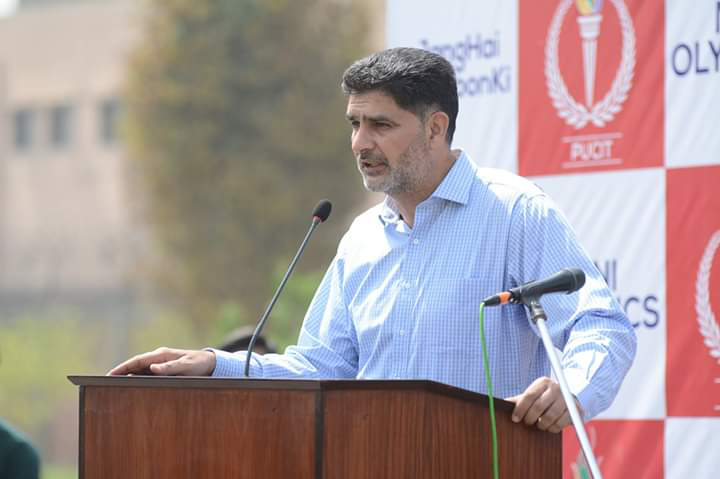

In [40]:
rgb_img

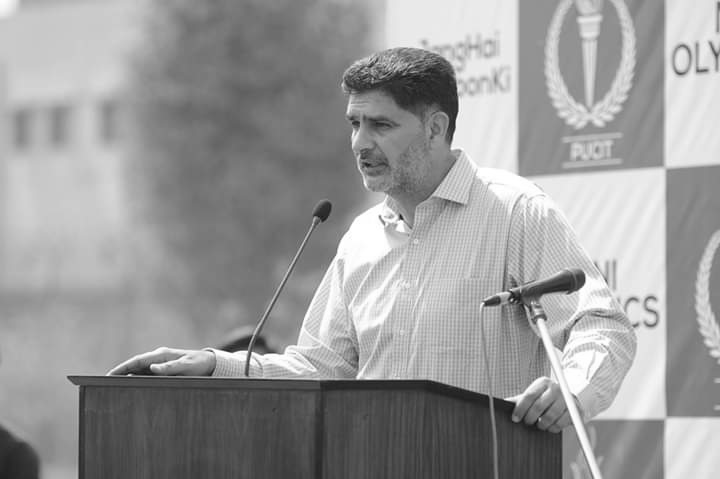

In [41]:
grey_img

#### Let us convert the two images to a NumPy array

In [47]:
rgb_img_array = np.array(rgb_img)

In [113]:
rgb_img_array.shape

NameError: name 'rgb_img_array' is not defined

In [112]:
rgb_img_array

NameError: name 'rgb_img_array' is not defined

In [32]:
grey_img_array = np.array(grey_img)

In [33]:
grey_img_array.shape

(479, 720)

In [34]:
grey_img_array

array([[253, 254, 254, ..., 201, 190, 200],
       [253, 253, 253, ..., 183, 165, 169],
       [252, 252, 252, ..., 160, 132, 130],
       ...,
       [ 34,  34,  34, ..., 217, 217, 217],
       [ 34,  34,  34, ..., 217, 217, 217],
       [ 33,  33,  33, ..., 217, 217, 217]], dtype=uint8)